# Displaying beam based aligmennt measurement re

In [1]:
import pathlib

from IPython.display import display, Markdown, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from pathlib import Path, PosixPath

In [2]:
import xarray as xr
import numpy as np
import os.path
import matplotlib.pyplot as plt

from dataclasses import dataclass
# %matplotlib notebook
%matplotlib inline

In [3]:
data_dir = Path(os.getcwd()) / ".." / "bact_analysis_bessyii"/ "scripts"
data_dir = Path(os.path.normpath(data_dir))
data_dir

PosixPath('/home/waheed/workspace/bact/custom/bessyii/analysis/bact_analysis_bessyii/scripts')

In [4]:
os.listdir(data_dir)

['estimated_angles_de2c658c-6327-4c85-99d6-141a2a36a562.nc',
 'bba.py',
 'offsets_de2c658c-6327-4c85-99d6-141a2a36a562.nc']

In [5]:
# campain 1788
uids = [
    # variable names without dt ....
    # 'bceb0543-46f4-4bf8-9757-2340cacefb3b',
    # 'b61e48bb-6f7b-4559-9053-f6049fc51bac'
]
uids += ['de2c658c-6327-4c85-99d6-141a2a36a562'
]
#campain 1945

In [6]:
uid = uids[-1]
estimated_angles = xr.load_dataset(os.path.join(data_dir, f'estimated_angles_{uid}.nc'))
offsets = xr.load_dataarray(os.path.join(data_dir, f'offsets_{uid}.nc'))

In [7]:
chck_path = '/home/waheed/workspace/bact/custom/bessyii/analysis/bact_analysis_bessyii/scripts'
os.listdir(chck_path)

['estimated_angles_de2c658c-6327-4c85-99d6-141a2a36a562.nc',
 'bba.py',
 'offsets_de2c658c-6327-4c85-99d6-141a2a36a562.nc']

In [8]:
estimated_angles.orbit

<xarray.DataArray 'orbit' (name: 2, plane: 2, pos: 1364)>
array([[[ 1.68745034e-04,  1.66269187e-04,  1.66269187e-04, ...,
          1.70812597e-04,  1.68745034e-04,  1.68745034e-04],
        [ 1.07356506e-05,  1.65397959e-05,  1.65397959e-05, ...,
          5.88864704e-06,  1.07356506e-05,  1.07356506e-05]],

       [[-1.01504079e-04, -9.66132799e-05, -9.66132799e-05, ...,
         -1.05588353e-04, -1.01504079e-04, -1.01504079e-04],
        [-1.29727742e-05, -7.26796231e-06, -7.26796231e-06, ...,
         -1.77368250e-05, -1.29727742e-05, -1.29727742e-05]]])
Coordinates:
  * name     (name) object 'q1m1d1r' 'q1m1d2r'
  * plane    (plane) object 'x' 'y'
  * pos      (pos) object 'start' 'dg9l2d1r' ... 'dg9l1d1r' 'ringend'
    quality  <U3 'pos'
Attributes:
    theta:                1e-05
    scale_tune:           1
    scale_phase_advance:  6.283185307179586

In [9]:

estimated_angles

<xarray.Dataset>
Dimensions:     (name: 2, plane: 2, pos: 1364, result: 2, parameter: 110,
                 step: 10, bpm_pos: 109)
Coordinates:
  * name        (name) object 'q1m1d1r' 'q1m1d2r'
  * plane       (plane) object 'x' 'y'
  * pos         (pos) object 'start' 'dg9l2d1r' ... 'dg9l1d1r' 'ringend'
  * result      (result) object 'value' 'error'
  * parameter   (parameter) object 'scaled_angle' 'bpmz6d1r' ... 'bpmz4d1r'
  * step        (step) int64 0 1 2 3 4 5 6 7 8 9
    bpm         (bpm_pos) object 'BPMZ6D1R' 'BPMZ7D1R' ... 'BPMZ3D1R' 'BPMZ4D1R'
    quality     <U3 'pos'
Dimensions without coordinates: bpm_pos
Data variables:
    orbit       (name, plane, pos) float64 0.0001687 0.0001663 ... -1.297e-05
    fit_params  (name, plane, result, parameter) float64 0.06773 ... 0.0
    ds          (pos) float64 0.0 0.6155 0.6155 1.137 ... 239.5 240.0 240.0
    ds_elems    (name) float64 232.9 22.89
    x_pos       (name, step, bpm_pos) float64 -0.003132 -0.003104 ... 0.0003035
    y_pos       (name, step, bpm_pos) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    x_rms       (name, step, bpm_pos) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    y_rms       (name, step, bpm_pos) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    excitation  (name, step) float64 0.0 0.0 -0.5 -0.5 0.0 ... 0.5 0.5 0.0 0.0
Attributes:
    bpm_names:  ['bpmz6d1r', 'bpmz7d1r', 'bpmz1t1r', 'bpmz2t1r', 'bpmz3t1r', ...

In [10]:
estimated_angles.orbit.attrs['theta']

1e-05

In [11]:
estimated_angles.fit_params.sel(name="q1m1d1r", plane="x", result="value", parameter="scaled_angle")

<xarray.DataArray 'fit_params' ()>
array(0.06772942)
Coordinates:
    name       <U7 'q1m1d1r'
    plane      <U1 'x'
    result     <U5 'value'
    parameter  <U12 'scaled_angle'
    quality    <U3 'pos'

In [12]:
pscale = 1000

Text(0.5, 0, 'ds [m]')

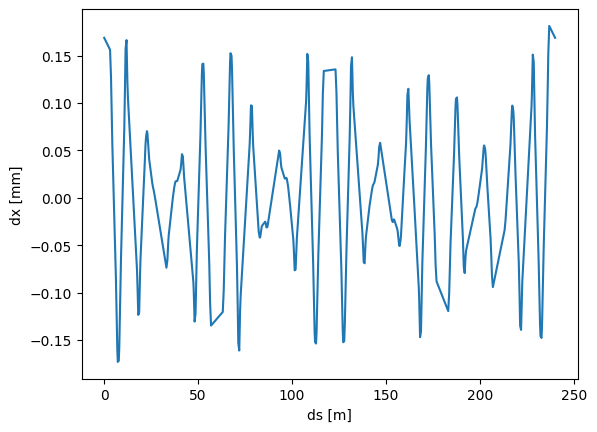

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    estimated_angles.ds, estimated_angles.orbit.sel(name="q1m1d1r", plane="x") * pscale
)
ax.set_ylabel("dx [mm]")
ax.set_xlabel("ds [m]")

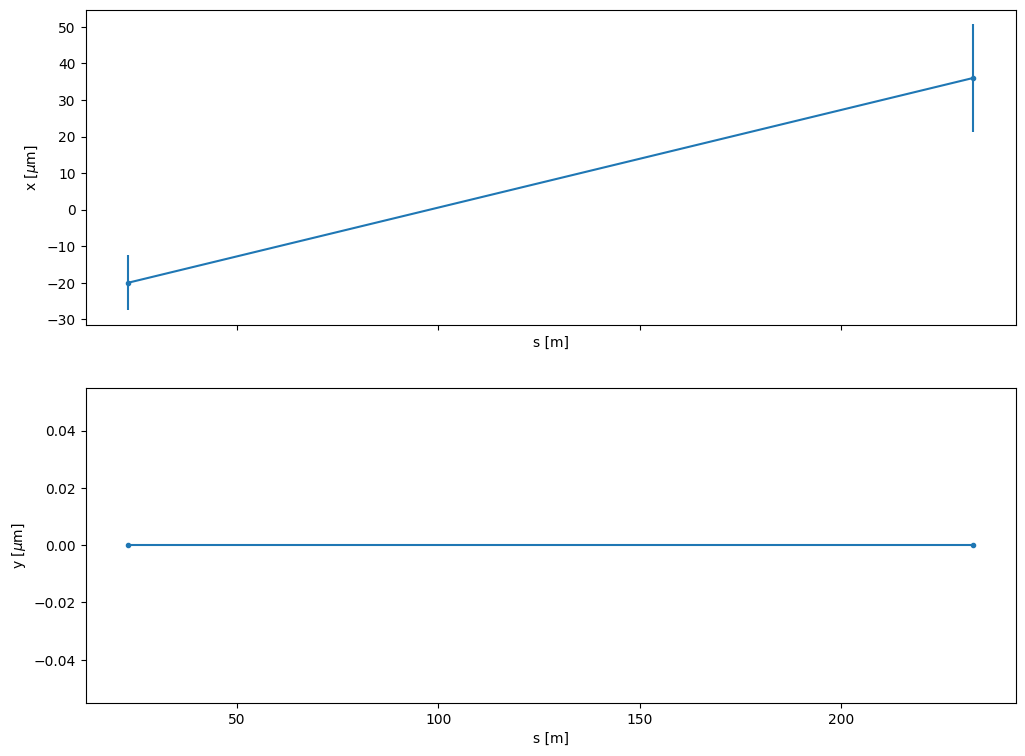

In [14]:
fig, axes = plt.subplots(2, 1, figsize=[12, 9], sharex=True)
ax_x, ax_y = axes
a_scale = 1e6

for uid in uids:
    estimated_angles = xr.load_dataset(os.path.join(data_dir, f'estimated_angles_{uid}.nc'))
    offsets = xr.load_dataarray(os.path.join(data_dir, f'offsets_{uid}.nc'))
    
    ds = estimated_angles.ds_elems
    quad_names = estimated_angles.coords['name'].values
    
    ax_x.errorbar(
        ds,
        offsets.sel(name=quad_names, result="value", plane="x") * a_scale,
        yerr=offsets.sel(name=quad_names, result="error", plane="x") * a_scale,
        fmt=".-",
    )
    ax_y.errorbar(
        ds,
        offsets.sel(name=quad_names, result="value", plane="y") * a_scale,
        yerr=offsets.sel(name=quad_names, result="error", plane="y") * a_scale,
        fmt=".-",
    )
    ax_y.set_xlabel("s [m]")
    ax_x.set_xlabel("s [m]")
    ax_x.set_ylabel("x [$\mu$m]")
    ax_y.set_ylabel("y [$\mu$m]")

In [15]:
@dataclass
class ReferenceOffsets:
    x: object
    xerr: object
    y: object
    yerr: object
    ds: object

Set refence plots start after next plot


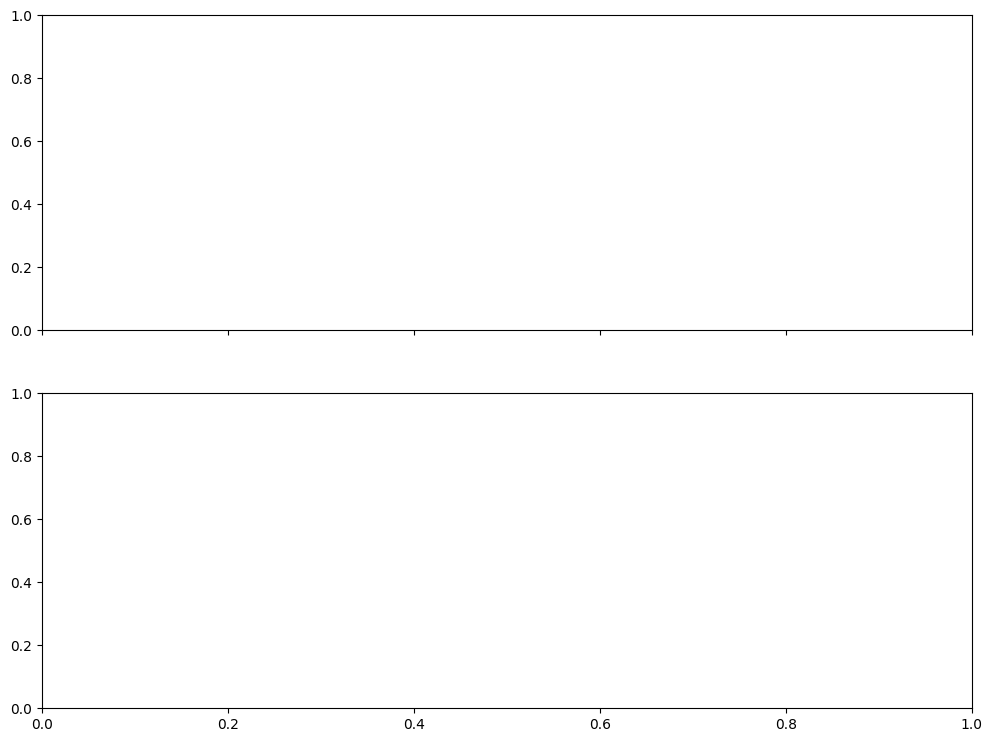

In [16]:
fig, axes = plt.subplots(2, 1, figsize=[12, 9], sharex=True)
ax_x, ax_y = axes
a_scale = 1e6

ref = None
for uid in uids:
    estimated_angles = xr.load_dataset(os.path.join(data_dir, f'estimated_angles_{uid}.nc'))
    offsets = xr.load_dataarray(os.path.join(data_dir, f'offsets_{uid}.nc'))
    
    
    ds = estimated_angles.ds_elems
    quad_names = estimated_angles.coords['name'].values
    x = offsets.sel(name=quad_names, result="value", plane="x") * a_scale
    y = offsets.sel(name=quad_names, result="value", plane="y") * a_scale
    xerr = offsets.sel(name=quad_names, result="error", plane="x") * a_scale
    yerr = offsets.sel(name=quad_names, result="error", plane="x") * a_scale
    if not ref:
        xerr= np.absolute(xerr)
        yerr= np.absolute(yerr)
        ref = ReferenceOffsets(x=x, y=y, xerr=xerr, yerr=yerr, ds=ds)
        print("Set refence plots start after next plot")
        continue 
    else:
        xerr = np.absolute(xerr) + ref.xerr
        yerr = np.absolute(xerr) + ref.yerr
        
    ax_x.errorbar(
        ds,
        x - ref.x,
        yerr=xerr,
        fmt=".-"
    )
    ax_y.errorbar(
        ds,
        y - ref.y,
        yerr=yerr,
        fmt=".-",
    )
    ax_y.set_xlabel("s [m]")
    ax_x.set_xlabel("s [m]")
    ax_x.set_ylabel("x [$\mu$m]")
    ax_y.set_ylabel("y [$\mu$m]")